This case is about a bank (Thera Bank) which has a growing customer base. Majority of these customers are liability customers (depositors) with varying size of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.


## Problem Statement:

The department wants to build a model that will help them identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign. The data file  contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign
(Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.


### Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.


### Data Description:
 
 - 1.ID:Customer ID							
 - 2.Age:Customer's age in completed years							
 - 3.Experience: Years of professional experience							
 - 4.Income: Annual income of the customer (In USD).
 - 5.ZIPCode: Home Address ZIP code.
 - 6.Family: Family size of the customer							
 - 7.CCAvg: Avg spending on credit cards per month (In USD)
 - 8.Education: Education Level- 1: Undergrad; 2: Graduate; 3: Advanced/Professional							
 - 9.Mortgage: Value of house mortgage if any. (In USD)							
 - 10.Personal Loan: Did this customer accept the personal loan offered in the last campaign?							
 - 11.Securities Account: Does the customer have a securities account with the bank?							
 - 12.CD Account: Does the customer have a certificate of deposit (CD) account with the bank?							
 - 13.Online: Does the customer use internet banking facilities?							
 - 14.CreditCard: Does the customer use a credit card issued by UniversalBank?							


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\$ubhajit\Downloads\Bank_Personal_Loan_Modelling-1.csv')
#Making a copy of the dataset.
df_copy=df.copy()

In [3]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [4]:
#replacing spaces with an underscore and return lower case text

df.columns = [i.replace(' ', '_').lower() for i in df.columns]
df.columns

Index(['id', 'age', 'experience', 'income', 'zip_code', 'family', 'ccavg',
       'education', 'mortgage', 'personal_loan', 'securities_account',
       'cd_account', 'online', 'creditcard'],
      dtype='object')

### Dataset Size

In [5]:
df.shape

(5000, 14)

There are 5000 rows and 14 columns in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   experience          5000 non-null   int64  
 3   income              5000 non-null   int64  
 4   zip_code            5000 non-null   int64  
 5   family              5000 non-null   int64  
 6   ccavg               5000 non-null   float64
 7   education           5000 non-null   int64  
 8   mortgage            5000 non-null   int64  
 9   personal_loan       5000 non-null   int64  
 10  securities_account  5000 non-null   int64  
 11  cd_account          5000 non-null   int64  
 12  online              5000 non-null   int64  
 13  creditcard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.head()

id  age  experience  income  zip_code  family  ccavg  education  mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   personal_loan  securities_account  cd_account  online  creditcard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
df.tail()

id  age  experience  income  zip_code  family  ccavg  education  \
4995  4996   29           3      40     92697       1    1.9          3   
4996  4997   30           4      15     92037       4    0.4          1   
4997  4998   63          39      24     93023       2    0.3          3   
4998  4999   65          40      49     90034       3    0.5          2   
4999  5000   28           4      83     92612       3    0.8          1   

      mortgage  personal_loan  securities_account  cd_account  online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      creditcard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

In [9]:
loans_counts=df['personal_loan'].value_counts().to_frame()
loans_counts

personal_loan
0           4520
1            480

In [10]:
df.describe().T

count          mean          std     min       25%  \
id                  5000.0   2500.500000  1443.520003     1.0   1250.75   
age                 5000.0     45.338400    11.463166    23.0     35.00   
experience          5000.0     20.104600    11.467954    -3.0     10.00   
income              5000.0     73.774200    46.033729     8.0     39.00   
zip_code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
family              5000.0      2.396400     1.147663     1.0      1.00   
ccavg               5000.0      1.937938     1.747659     0.0      0.70   
education           5000.0      1.881000     0.839869     1.0      1.00   
mortgage            5000.0     56.498800   101.713802     0.0      0.00   
personal_loan       5000.0      0.096000     0.294621     0.0      0.00   
securities_account  5000.0      0.104400     0.305809     0.0      0.00   
cd_account          5000.0      0.060400     0.238250     0.0      0.00   
online              5000.0      0.596800     0.490589     0.0      0.00   
creditcard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
id                   2500.5   3750.25   5000.0  
age                    45.0     55.00     67.0  
experience             20.0     30.00     43.0  
income                 64.0     98.00    224.0  
zip_code            93437.0  94608.00  96651.0  
family                  2.0      3.00      4.0  
ccavg                   1.5      2.50     10.0  
education               2.0      3.00      3.0  
mortgage                0.0    101.00    635.0  
personal_loan           0.0      0.00      1.0  
securities_account      0.0      0.00      1.0  
cd_account              0.0      0.00      1.0  
online                  1.0      1.00      1.0  
creditcard              0.0      1.00      1.0

In [11]:
df.nunique()

id                    5000
age                     45
experience              47
income                 162
zip_code               467
family                   4
ccavg                  108
education                3
mortgage               347
personal_loan            2
securities_account       2
cd_account               2
online                   2
creditcard               2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021DEE1C8A20>,
      dtype=object)

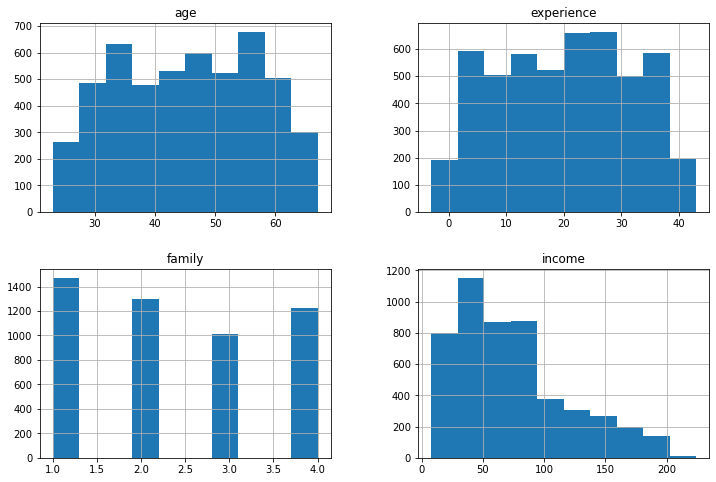

In [12]:
features = ['age', 'experience', 'family','income']
df[features].hist(figsize=(12, 8))

## Univariate Analysis:

In [13]:
#!pip install pandas_profiling

In [14]:
import pandas_profiling
df.profile_report()

- *Click on Toggle details to see more analysis.*

### Points observed by profile report & univariate analysis:

- The data set got 0 missing cells.
- It got 7 numeric variables: ‘age’, ‘cc_avg’, ‘id’, ‘income’, ‘mortgage’, ‘zip_code’, ‘experience’
- It got 2 categorical variables: ‘education’, ‘family’
- It got 5 Boolean variables: ‘cd_account’, ‘credit_card’, ‘online’, ‘personal_loan’, ‘securities_account’
- Personal Loan is highly correlated with Income, average spending on Credit cards, mortgage & if the customer has a certificate of deposit (cd) account with the bank.
- Also, Experience is highly correlated with Age.
- 42% of the candidates are graduated, while 30% are professional and 28% are Undergraduate.
- Around 29% of the customer’s family size is 1.
- 94% of the customer doesn’t have a certificate of deposit (cd) account with the bank.
- Around 71% of the customer doesn’t use a credit card issued by UniversalBank.
- Around 60% of customers use internet banking facilities.
- Around 90% of the customer doesn’t accept the personal loan offered in the last campaign.
- Around 90% of the customer doesn’t have a securities account with the bank.
- The mean age of the customers is 45 with standard deviation of 11.5. Also, we had estimated the average age in hypothesis testing between 30–50. The curve is slightly negatively skewed (Skewness = -0.02934068151) hence the curve is fairly symmetrical
- The mean of Avg. spending on credit cards per month is 1.93 with standard deviation of 1.75. The curve is highly positive skewed (Skewness = 1.598443337)
- The mean annual income of the customer is 73.77 with standard deviation of 46. The curve is moderately positive skewed (Skewness = 0.8413386073)
- The mean value of house mortgage is 56.5 with standard deviation of 101.71. The curve is highly positive skewed (Skewness = 2.104002319) and there are a lot of outlier’s present (Kurtosis = 4.756796669)

In [15]:
#Dropping 'ID' and 'ZIP Code' as they are just numbers of series

df.drop('id',axis=1,inplace=True)
df.drop('zip_code',axis=1,inplace=True)

### Bivariate Analysis:

Cross tabulation can be given as: 
 personal_loan     0    1
education               
1              2003   93
2              1221  182
3              1296  205
Cross tabulation in percentages: 
 personal_loan         0         1
education                        
1              0.955630  0.044370
2              0.870278  0.129722
3              0.863424  0.136576


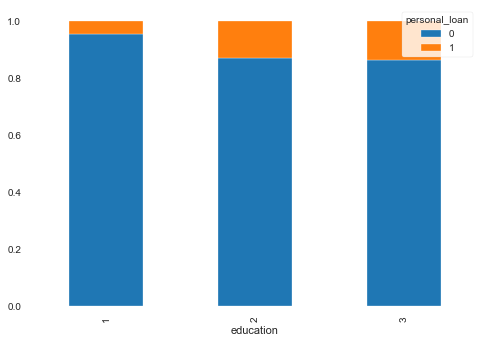

In [16]:
df_edu=pd.crosstab(df['education'],df['personal_loan'])
df_edu.div(df_edu.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
print('Cross tabulation can be given as:','\n',df_edu)
print('Cross tabulation in percentages:','\n',df_edu.div(df_edu.sum(1).astype(float),axis=0))

- From the above plots, we can infer that customers who are more educated have a higher probability of buying personal loans.

Cross tabulation can be given as: 
 personal_loan     0    1
family                  
1              1365  107
2              1190  106
3               877  133
4              1088  134
Cross tabulation in percentages: 
 personal_loan         0         1
family                           
1              0.927310  0.072690
2              0.918210  0.081790
3              0.868317  0.131683
4              0.890344  0.109656


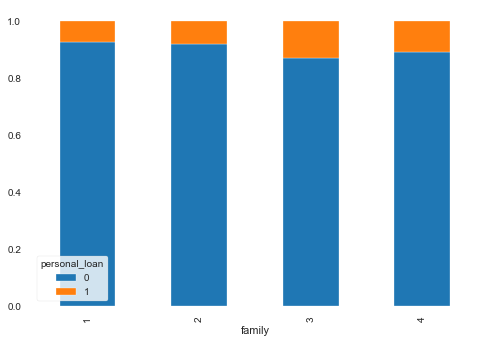

In [17]:
df_family=pd.crosstab(df['family'],df['personal_loan'])
df_family.div(df_family.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
print('Cross tabulation can be given as:','\n',df_family)
print('Cross tabulation in percentages:','\n',df_family.div(df_family.sum(1).astype(float),axis=0))

- The number of family members not significantly affect probability.

Cross tabulation can be given as: 
 personal_loan     0    1
cd_account              
0              4358  340
1               162  140
Cross tabulation in percentages: 
 personal_loan         0         1
cd_account                       
0              0.927629  0.072371
1              0.536424  0.463576


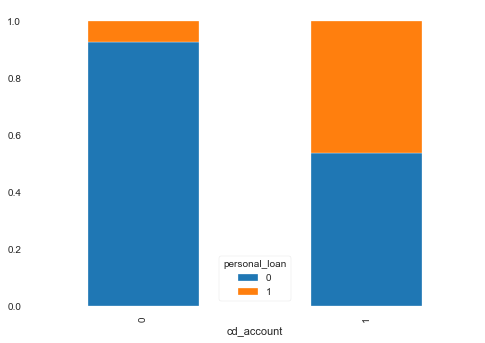

In [18]:
df_cd=pd.crosstab(df['cd_account'],df['personal_loan'])
df_cd.div(df_cd.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
print('Cross tabulation can be given as:','\n',df_cd)
print('Cross tabulation in percentages:','\n',df_cd.div(df_cd.sum(1).astype(float),axis=0))

- The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.

Cross tabulation can be given as: 
 personal_loan     0    1
creditcard              
0              3193  337
1              1327  143
Cross tabulation in percentages: 
 personal_loan         0         1
creditcard                       
0              0.904533  0.095467
1              0.902721  0.097279


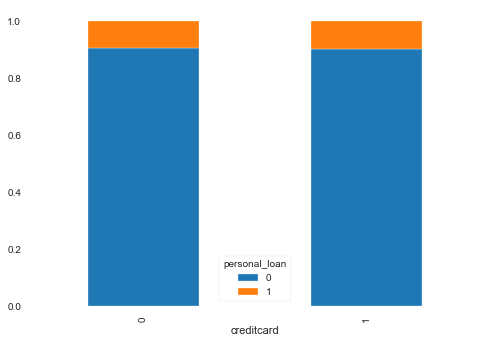

In [19]:
df_credit=pd.crosstab(df['creditcard'],df['personal_loan'])
df_credit.div(df_credit.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
print('Cross tabulation can be given as:','\n',df_credit)
print('Cross tabulation in percentages:','\n',df_credit.div(df_credit.sum(1).astype(float),axis=0))

- The customer who uses or doesn’t use a credit card issued by Bank doesn’t seem to affect the probability of buying a personal loan.

Cross tabulation can be given as: 
 personal_loan     0    1
online                  
0              1827  189
1              2693  291
Cross tabulation in percentages: 
 personal_loan        0        1
online                         
0              0.90625  0.09375
1              0.90248  0.09752


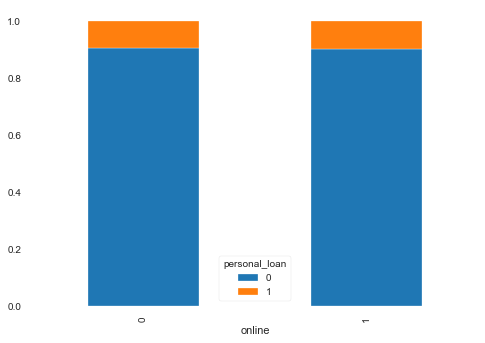

In [20]:
df_online=pd.crosstab(df['online'],df['personal_loan'])
df_online.div(df_online.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)
print('Cross tabulation can be given as:','\n',df_online)
print('Cross tabulation in percentages:','\n',df_online.div(df_online.sum(1).astype(float),axis=0))

- The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.

Cross tabulation can be given as: 
 personal_loan          0    1
securities_account           
0                   4058  420
1                    462   60
Cross tabulation in percentages: 
 personal_loan              0         1
securities_account                    
0                   0.906208  0.093792
1                   0.885057  0.114943


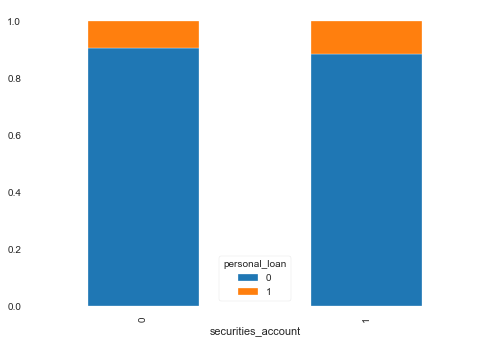

In [21]:
df_securities=pd.crosstab(df['securities_account'],df['personal_loan'])
df_securities.div(df_securities.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True)

print('Cross tabulation can be given as:','\n',df_securities)
print('Cross tabulation in percentages:','\n',df_securities.div(df_securities.sum(1).astype(float),axis=0))

- The customers who have or don’t have securities account with the bank do not affect the probability of buying a personal loan.

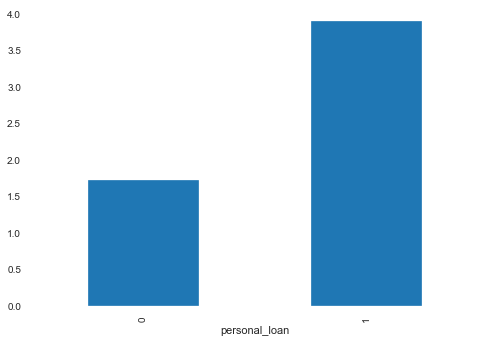

In [22]:
df.groupby('personal_loan')['ccavg'].mean().plot(kind='bar')

- Here the y-axis represents the mean applicant spending on credit cards per month ('$000'). It can be clearly seen that applicants who spend more on credit cards are more viable to buy personal loans.

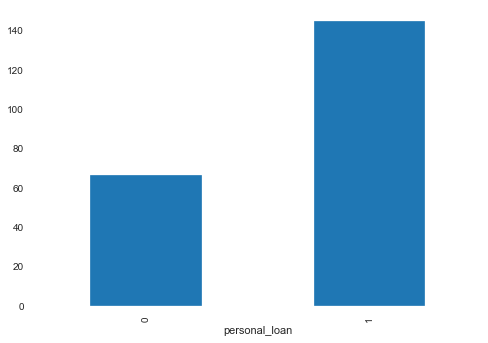

In [23]:
df.groupby('personal_loan')['income'].mean().plot(kind='bar')

- Here the y-axis represents the mean annual income of the customer ($000). It can be clearly seen that the customers with high incomes are more feasible to buy the personal loan.

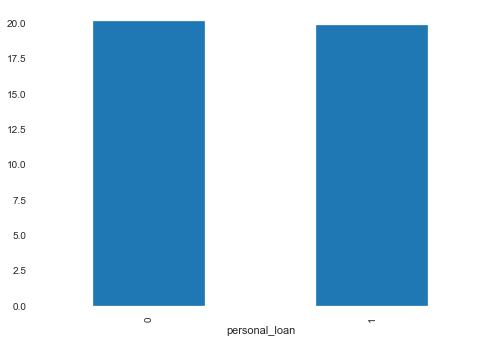

In [24]:
df.groupby('personal_loan')['experience'].mean().plot(kind='bar')

- The customers who have or don’t have experiences do not affect the probability of buying a personal loan.

### Missing Value and Outlier Treatment:

In [25]:
#rechecking missing value:

df.isnull().sum()

age                   0
experience            0
income                0
family                0
ccavg                 0
education             0
mortgage              0
personal_loan         0
securities_account    0
cd_account            0
online                0
creditcard            0
dtype: int64

#### Outlier Treatment:

As we saw earlier in univariate analysis, Mortgage contains outliers, so I must treat them as the presence of outliers affects the distribution of the data.Due to these outliers’ bulk of the data in the Mortgage is Right Skewed.One way to remove the skewness is by doing the z-score.

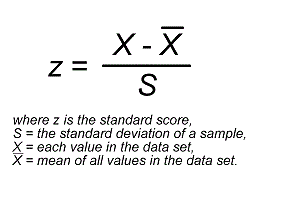

In [26]:
# importing Z-score from stst library.
from scipy import stats
df['Mortgage_Zscore']=np.abs(stats.zscore(df['mortgage']))
df=df[df['Mortgage_Zscore']<3]
df.drop('Mortgage_Zscore',axis=1,inplace=True)

C:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [27]:
df.shape

(4895, 12)

Here I had chosen those rows only whose z_score is less than 3, it can vary accordingly. Here I had dropped more than 100+ rows which contain outliers and now I can start with the model building.

### Model Building: Logistic Regression

In [28]:
#Importing library for spliting data
from sklearn.model_selection import train_test_split
#Importing model
from sklearn.linear_model import LogisticRegression
#Importing library to check accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc


#### Spliting of the data in the ratio of 70:30 respectively

In [29]:
# set of independent variable
X=df.drop('personal_loan',axis=1)
# set of dependent variable
y=df['personal_loan']
#Spliting of the data in the ratio of 70:30 respectively
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

#### Standardising and normalising the data:

In [30]:
#Importing libraries
from sklearn import preprocessing
#Get column names
column_name= df.columns
#Create scaler object
scaler=preprocessing.StandardScaler()
#Fit data on the scaler object
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.fit_transform(X_test)

In [31]:
scaled_X_train

array([[ 1.6591359 ,  1.76941677,  0.51724093, ..., -0.24766568,
         0.82876641,  1.54772124],
       [-1.39533704, -1.46417427, -0.0634865 , ..., -0.24766568,
         0.82876641,  1.54772124],
       [-0.43535983, -0.41544204,  0.40556258, ..., -0.24766568,
         0.82876641, -0.64611118],
       ...,
       [ 0.8737    ,  0.89547325, -0.979249  , ..., -0.24766568,
        -1.2066126 , -0.64611118],
       [-0.26081852, -0.24065333,  0.13753453, ..., -0.24766568,
         0.82876641, -0.64611118],
       [ 1.04824131,  1.07026195, -0.979249  , ..., -0.24766568,
         0.82876641,  1.54772124]])

In [32]:
scaled_X_test

array([[ 0.51022369,  0.44147201, -0.83912375, ..., -0.24627184,
        -1.23804629, -0.64755206],
       [-1.41453516, -1.4733706 ,  0.19287094, ..., -0.24627184,
         0.80772424, -0.64755206],
       [ 0.59771272,  0.61554861, -0.39043041, ..., -0.24627184,
         0.80772424,  1.54427738],
       ...,
       [ 1.82255926,  1.92112311,  0.73130296, ..., -0.24627184,
         0.80772424, -0.64755206],
       [ 1.38511407,  1.31185501, -0.07634507, ..., -0.24627184,
         0.80772424, -0.64755206],
       [ 0.51022369,  0.52851031,  0.19287094, ..., -0.24627184,
        -1.23804629,  1.54427738]])

In [33]:
#normalize the data attributes
normalized_X = preprocessing.normalize(X)

In [34]:
logreg=LogisticRegression()
#Fitting the model into training dataset
logreg.fit(scaled_X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred=logreg.predict(scaled_X_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1341
           1       0.82      0.59      0.69       128

    accuracy                           0.95      1469
   macro avg       0.89      0.79      0.83      1469
weighted avg       0.95      0.95      0.95      1469



In [37]:
print(accuracy_score(y_test,y_pred))

0.9530292716133424


In [38]:
print(confusion_matrix(y_test,y_pred))

[[1324   17]
 [  52   76]]


So, we can see 95% accuracy by applying logistic regression model.

In [39]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [40]:
logreg_prob=logreg.predict_proba(scaled_X_test)
fpr,tpr,threshold=roc_curve(y_test,logreg_prob[:,1])
roc_auc=auc(fpr,tpr)
print('Area under the ROC curve :%f'%roc_auc)

Area under the ROC curve :0.949560


The area under ROC curve got 95% accuracy.

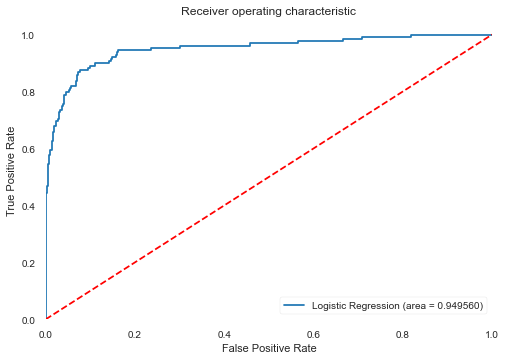

In [41]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The dotted line represents the ROC curve of a purely random classifier.

### Decision Tree:

Let us see if the decision tree with criterion as entropy can nail it down to higher recall value or with criterion as gini.

In [42]:
from sklearn.tree import DecisionTreeClassifier
dec_treeE=DecisionTreeClassifier(criterion='entropy',random_state=1)
dec_treeE.fit(scaled_X_train,y_train)
y_pred=dec_treeE.predict(scaled_X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1341
           1       0.88      0.91      0.90       128

    accuracy                           0.98      1469
   macro avg       0.94      0.95      0.94      1469
weighted avg       0.98      0.98      0.98      1469



In [44]:
print(accuracy_score(y_test,y_pred))

0.9816201497617427


In [45]:
print(confusion_matrix(y_test,y_pred))

[[1325   16]
 [  11  117]]


In [46]:
dec_treeE_prob=dec_treeE.predict_proba(scaled_X_test)
fpr1,tpr1,threshold1=roc_curve(y_test,dec_treeE_prob[:,1])
roc_auc1=auc(fpr1,tpr1)
print('Area under the ROC curve :%f'%roc_auc1)

Area under the ROC curve :0.951066


- We got a 98% accuracy score while 91% recall value.

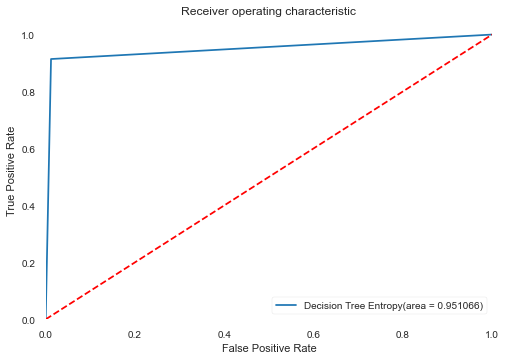

In [47]:
plt.figure()
plt.plot(fpr1, tpr1, label='Decision Tree Entropy(area = %f)' % roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [48]:
from sklearn.tree import DecisionTreeClassifier
dec_treeG=DecisionTreeClassifier(criterion='gini',random_state=1)
dec_treeG.fit(scaled_X_train,y_train)
y_pred=dec_treeG.predict(scaled_X_test)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1341
           1       0.83      0.88      0.86       128

    accuracy                           0.97      1469
   macro avg       0.91      0.93      0.92      1469
weighted avg       0.97      0.97      0.97      1469



In [50]:
print(accuracy_score(y_test,y_pred))

0.9741320626276379


In [51]:
print(confusion_matrix(y_test,y_pred))

[[1318   23]
 [  15  113]]


In [52]:
dec_treeG_prob=dec_treeG.predict_proba(scaled_X_test)
fpr2,tpr2,threshold2=roc_curve(y_test,dec_treeG_prob[:,1])
roc_auc2=auc(fpr2,tpr2)
print('Area under the ROC curve :%f'%roc_auc2)

Area under the ROC curve :0.932831


- We got a 97% accuracy score while an astonishing 88% recall value. 

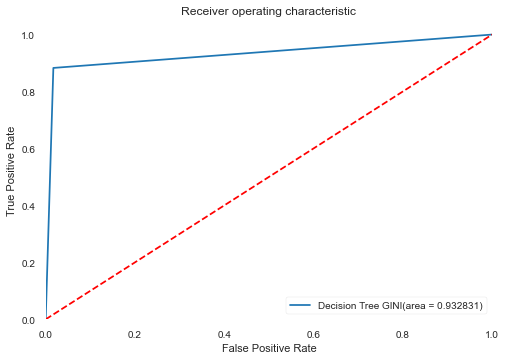

In [53]:
plt.figure()
plt.plot(fpr2, tpr2, label='Decision Tree GINI(area = %f)' % roc_auc2)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The area under the ROC curve is much smaller in this case too. The reason being the ‘overfitting’ of the data. Let us check the accuracy score for training as well as test data.

In [54]:
print(dec_treeE.score(scaled_X_train,y_train))

1.0


In [55]:
print(dec_treeG.score(scaled_X_train,y_train))

1.0


Now we will use Hyperparameter prunning to generalise the overfitting of data.

In [56]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_prunE=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=7,random_state=2)
dec_tree_prunE.fit(scaled_X_train,y_train)
y_pred=dec_tree_prunE.predict(scaled_X_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1341
           1       0.95      0.88      0.91       128

    accuracy                           0.99      1469
   macro avg       0.97      0.94      0.95      1469
weighted avg       0.99      0.99      0.99      1469



In [58]:
print(accuracy_score(y_test,y_pred))

0.9857045609257998


In [59]:
print(confusion_matrix(y_test,y_pred))

[[1335    6]
 [  15  113]]


In [60]:
dec_tree_prunE_prob=dec_tree_prunE.predict_proba(scaled_X_test)
fpr3,tpr3,threshold3=roc_curve(y_test,dec_tree_prunE_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print('Area under the ROC curve :%f'%roc_auc3)

Area under the ROC curve :0.990076


We can see the difference now. We got 98% accuracy with 88% recall value, also the AUC is 99% which is fairly good.
Let us check the same for the criterion ‘Gini’ then we can conclude to the results of decision trees.

In [61]:
from sklearn.tree import DecisionTreeClassifier
dec_tree_prunG=DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_leaf=7,random_state=2)
dec_tree_prunG.fit(scaled_X_train,y_train)
y_pred=dec_tree_prunG.predict(scaled_X_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1341
           1       0.91      0.83      0.87       128

    accuracy                           0.98      1469
   macro avg       0.95      0.91      0.93      1469
weighted avg       0.98      0.98      0.98      1469



In [63]:
print(accuracy_score(y_test,y_pred))

0.9782164737916951


In [64]:
print(confusion_matrix(y_test,y_pred))

[[1331   10]
 [  22  106]]


In [65]:
dec_tree_prunG_prob=dec_tree_prunG.predict_proba(scaled_X_test)
fpr3,tpr3,threshold3=roc_curve(y_test,dec_tree_prunG_prob[:,1])
roc_auc3=auc(fpr3,tpr3)
print('Area under the ROC curve :%f'%roc_auc3)

Area under the ROC curve :0.982391


We got 83% recall value with a 97% accuracy level, also AUC is approximately 98% which is also fairly good.

### Naive Bayes:

In [66]:
from sklearn.naive_bayes import GaussianNB

naive_model=GaussianNB()
naive_model.fit(scaled_X_train,y_train)
y_pred=naive_model.predict(scaled_X_test)

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1341
           1       0.42      0.59      0.50       128

    accuracy                           0.89      1469
   macro avg       0.69      0.76      0.72      1469
weighted avg       0.91      0.89      0.90      1469



In [68]:
print(accuracy_score(y_test,y_pred))

0.8944860449285228


In [69]:
print(confusion_matrix(y_test,y_pred))

[[1238  103]
 [  52   76]]


In [70]:
naive_model_prob=naive_model.predict_proba(scaled_X_test)
fpr4,tpr4,threshold4=roc_curve(y_test,naive_model_prob[:,1])
roc_auc4=auc(fpr4,tpr4)
print('Area under the ROC curve :%f'%roc_auc4)

Area under the ROC curve :0.924246


We got 59% recall value with a 89% accuracy level, also AUC is approximately 92%.

#### Which is the best model in this case:

The Decision Tree model is the best as the accuracy of the train and test set is almost similar and also the precsion and recall accuracy is good. The confusion matrix is also better in comparision to Logistic Regression and Naive Bayes model.
Naive bayes has very low performance in this case.